In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('../../datasets/HousePrice Prediction/train.csv')
df_test = pd.read_csv('../../datasets/HousePrice Prediction/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

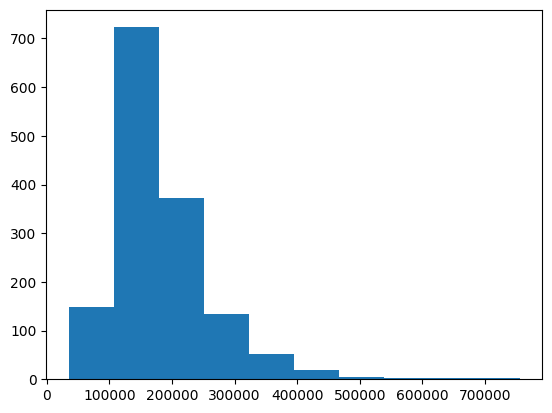

In [4]:
plt.hist(df_train['SalePrice'])

In [5]:
df_train=df_train[df_train['SalePrice']<540000]

# Missing Values

In [6]:
df_train.isna().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1362,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [7]:
columns_numeric = list(df_train.select_dtypes(exclude='object').columns)
columns_numeric.remove('Id')
columns_numeric.remove('SalePrice')
columns_categorical = list(df_train.select_dtypes(include='object').columns)

In [8]:
from sklearn.impute import SimpleImputer
imputer_numeric = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

imputer_numeric.fit(df_train[columns_numeric]) # median of every column
imputer_cat.fit(df_train[columns_categorical]) # mode of every column

df_train[columns_numeric] = imputer_numeric.transform(df_train[columns_numeric]) # fills missing data
df_train[columns_categorical] = imputer_cat.transform(df_train[columns_categorical]) # fill

In [9]:
df_train.isna().sum().sum()

0

In [10]:
df_test[columns_numeric] = imputer_numeric.transform(df_test[columns_numeric]) # fills missing data
df_test[columns_categorical] = imputer_cat.transform(df_test[columns_categorical]) # fill

In [11]:
df_test.isna().sum().sum()

0

# Feature Encoding - Categorical =>OneHotEncoding

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df_train[columns_categorical]) # finds new column names(all categories)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [13]:
new_columns = list(encoder.get_feature_names_out())

In [14]:
len(new_columns)

252

In [15]:
df_train[new_columns] = encoder.transform(df_train[columns_categorical])
df_test[new_columns] = encoder.transform(df_test[columns_categorical])

C:\Users\samwa\AppData\Local\Temp\ipykernel_13900\1602800353.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_columns] = encoder.transform(df_train[columns_categorical])
C:\Users\samwa\AppData\Local\Temp\ipykernel_13900\1602800353.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_columns] = encoder.transform(df_train[columns_categorical])
C:\Users\samwa\AppData\Local\Temp\ipykernel_13900\1602800353.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

C:\Users\samwa\AppData\Local\Temp\ipykernel_13900\1602800353.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_columns] = encoder.transform(df_test[columns_categorical])
C:\Users\samwa\AppData\Local\Temp\ipykernel_13900\1602800353.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_columns] = encoder.transform(df_test[columns_categorical])
C:\Users\samwa\AppData\Local\Temp\ipykernel_13900\1602800353.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [16]:
df_train.shape

(1453, 333)

# Feature Scaling - Numeric

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[columns_numeric])
df_train[columns_numeric] = scaler.transform(df_train[columns_numeric])
df_test[columns_numeric] = scaler.transform(df_test[columns_numeric])

In [18]:
columns_selected = columns_numeric + new_columns
X_train = df_train[columns_selected]
y_train = df_train['SalePrice']
X_test = df_test[columns_selected]
# y_test = 

In [19]:
len(columns_selected)

288

# Feature Reduction - PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
pca.fit(X_train)  # Finds out principal components (Eigen Vectors)

PCA(n_components=0.98)

In [21]:
pca.n_components_

138

In [22]:
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)

In [23]:
X_train_red.shape

(1453, 138)

# Model Building

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
params={'max_depth':[4,5,6,7,8,9],'min_samples_leaf':[5,6,7,8,9,10],'n_estimators':[10,30,50,100,175,200]}

In [26]:
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(estimator=RandomForestRegressor(random_state=1),param_grid=params,verbose=0,n_jobs=5,cv=5)

In [27]:
gridcv.fit(X_train_red,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=5,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 30, 50, 100, 175, 200]})

In [28]:
gridcv.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 175}

In [29]:

model = RandomForestRegressor(max_depth=9,min_samples_leaf=5,n_estimators=175,random_state=1)
model.fit(X_train_red,y_train)
model.score(X_train_red,y_train)

0.9129328597603491

In [57]:
yp = model.predict(X_test_red)

In [58]:
df_submit = pd.DataFrame({'Id':df_test['Id'],'SalePrice':yp})

In [59]:
df_submit.to_csv('Houseoutlier.csv',index=False)

In [60]:
yp

array([126829.92498515, 144284.05394546, 186505.61808263, ...,
       128849.04386786, 143192.78511788, 206670.07421373])